## Метод на нейронной сети

Подключаемые модули

In [0]:
import pandas as pd
import numpy as np
import pickle
import math

Подгрузка данных о доменных именах с диска 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
with open('/content/gdrive/My Drive/Colab Notebooks/Res/input data/training_data.pkl', 'rb') as f:
  training_data = pickle.load(f)

Общая коллекция данных

In [0]:
family_dict = {idx+1:x for idx, x in enumerate(training_data['dga']['family'].unique())}

In [0]:
classes = len(family_dict)

In [6]:
family_dict

{1: 'Cryptolocker',
 2: 'Post',
 3: 'geodo',
 4: 'dyre',
 5: 'corebot',
 6: 'symmi',
 7: 'nymaim',
 8: 'padcrypt',
 9: 'virut',
 10: 'matsnu',
 11: 'tinba',
 12: 'pushdo',
 13: 'P2P',
 14: 'shifu',
 15: 'shiotob/urlzone/bebloh',
 16: 'banjori',
 17: 'hesperbot',
 18: 'cryptowall',
 19: 'ramnit',
 20: 'dircrypt',
 21: 'ranbyus',
 22: 'simda',
 23: 'pykspa',
 24: 'murofet',
 25: 'locky',
 26: 'Volatile',
 27: 'beebone',
 28: 'bedep',
 29: 'suppobox',
 30: 'fobber',
 31: 'necurs',
 32: 'qakbot',
 33: 'mydoom',
 34: 'tempedreve',
 35: 'ramdo',
 36: 'kraken',
 37: 'bamital',
 38: 'vawtrak',
 39: 'sisron',
 40: 'chinad',
 41: 'gozi',
 42: 'sphinx',
 43: 'proslikefan',
 44: 'vidro',
 45: 'madmax',
 46: 'dromedan',
 47: 'g01',
 48: 'pandabanker',
 49: 'pizd',
 50: 'mirai',
 51: 'tofsee',
 52: 'unknownjs',
 53: 'unknowndropper'}

In [7]:
all_data_dict = pd.concat([training_data['legit'], training_data['dga']], ignore_index=True)
dga_data_dict = pd.concat([training_data['dga']], ignore_index=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [8]:
all_data_dict

,data,domain,family,subtype,type
0,NaN,netflix,NaN,NaN,0
1,NaN,netflix,NaN,NaN,0
2,NaN,netflix,NaN,NaN,0
3,NaN,netflix,NaN,NaN,0
4,NaN,google,NaN,NaN,0
...,...,...,...,...,...
1817626,2019-11-16,tkdnd,unknowndropper,52.0,1
1817627,2019-11-16,tkndd,unknowndropper,52.0,1
1817628,2019-11-16,tnddk,unknowndropper,52.0,1
1817629,2019-11-16,tndkd,unknowndropper,52.0,1


Массивы обучения

In [0]:
# Массив x хранит образцы обучения
# В массиве y хранятся целевые значения (метки типов) для образцов обучения
X = np.array(all_data_dict['domain'].tolist())
y = np.array(all_data_dict['type'].tolist())
X_dga = np.array(dga_data_dict['domain'].tolist())
y_dga = np.array(dga_data_dict['subtype'].tolist())

In [10]:
X_dga

array(['yfxihttvspowlj', 'ibontoytrpwule', 'vnnvwjuhiroolh', ..., 'tnddk',
       'tndkd', 'tnkdd'], dtype='<U44')

In [11]:
y_dga

array([ 0,  0,  0, ..., 52, 52, 52])

In [12]:
from tensorflow.keras.preprocessing import sequence

In [0]:
# Создание словаря действительных символов
valid_chars = {x:idx+1 for idx, x in enumerate(set(''.join(X)))}

In [14]:
valid_chars

{'-': 32,
 '0': 17,
 '1': 14,
 '2': 16,
 '3': 21,
 '4': 30,
 '5': 8,
 '6': 4,
 '7': 13,
 '8': 19,
 '9': 33,
 'a': 31,
 'b': 27,
 'c': 23,
 'd': 37,
 'e': 6,
 'f': 12,
 'g': 34,
 'h': 3,
 'i': 5,
 'j': 18,
 'k': 36,
 'l': 11,
 'm': 9,
 'n': 35,
 'o': 29,
 'p': 2,
 'q': 25,
 'r': 22,
 's': 26,
 't': 7,
 'u': 1,
 'v': 20,
 'w': 15,
 'x': 24,
 'y': 28,
 'z': 10}

In [15]:
# Количество уникальных символов
max_features = len(valid_chars) + 1
max_features

38

In [16]:
# Макс последовательность символов
maxlen = np.max([len(x) for x in X])
maxlen

53

In [0]:
# Преобразование символов в int и pad (последовательности одиннаковой длины)
X = [[valid_chars[y] for y in x] for x in X]
X = sequence.pad_sequences(X, maxlen=maxlen)

X_dga = [[valid_chars[y] for y in x] for x in X_dga]
X_dga = sequence.pad_sequences(X_dga, maxlen=maxlen)

In [18]:
X

array([[ 0,  0,  0, ..., 11,  5, 24],
       [ 0,  0,  0, ..., 11,  5, 24],
       [ 0,  0,  0, ..., 11,  5, 24],
       ...,
       [ 0,  0,  0, ..., 37, 37, 36],
       [ 0,  0,  0, ..., 37, 36, 37],
       [ 0,  0,  0, ..., 36, 37, 37]], dtype=int32)

Построение модели

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, SimpleRNN, GRU, Convolution1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
# 33% для теста
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

X_dga_train, X_dga_test, y_dga_train, y_dga_test = train_test_split(X_dga, y_dga, test_size=0.01, random_state=42)

In [21]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(128))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 53, 128)           4864      
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
_________________________________________________________________
activation (Activation)    

In [22]:
model_dga = Sequential()
model_dga.add(Embedding(max_features, 128, input_length=maxlen))
model_dga.add(LSTM(128))
model_dga.add(Dropout(rate=0.2))
model_dga.add(Dense(classes))
model_dga.add(Activation('sigmoid'))
model_dga.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['sparse_categorical_accuracy'])
model_dga.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 53, 128)           4864      
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 53)                6837      
_________________________________________________________________
activation_1 (Activation)    (None, 53)                0         
Total params: 143,285
Trainable params: 143,285
Non-trainable params: 0
_________________________________________________________________


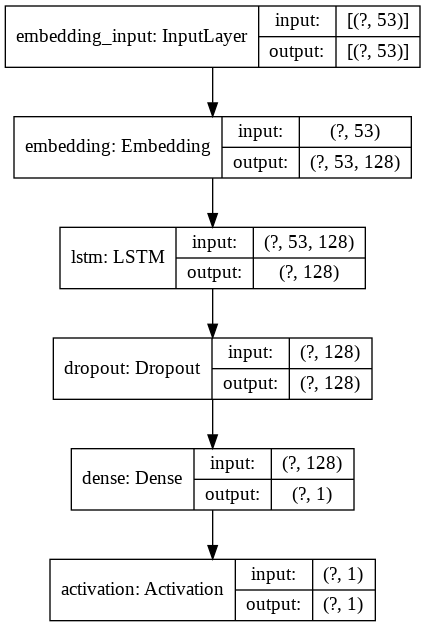

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

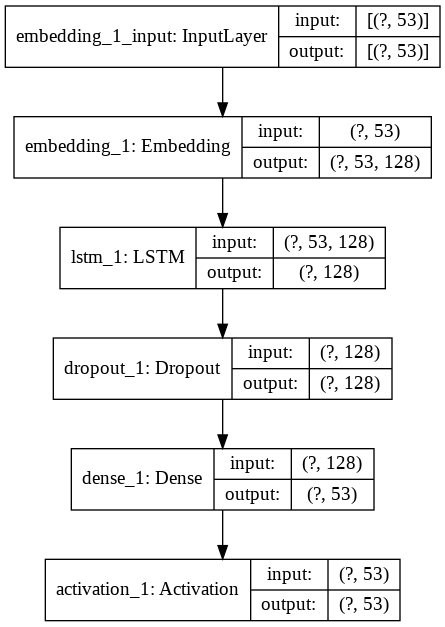

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model_dga, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [0]:
# Игнорирование предостережения о нехватке памяти
import warnings
warnings.filterwarnings('ignore')

Обучение + кросс-валидация

In [22]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=5, batch_size=1024, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 1799454 samples, validate on 18177 samples
Epoch 1/5
1799454/1799454 [==============================] - 160s 89us/sample - loss: 0.1387 - acc: 0.9521 - val_loss: 0.0864 - val_acc: 0.9721
Epoch 2/5
1799454/1799454 [==============================] - 167s 93us/sample - loss: 0.0744 - acc: 0.9767 - val_loss: 0.0661 - val_acc: 0.9792
Epoch 3/5
1799454/1799454 [==============================] - 166s 92us/sample - loss: 0.0608 - acc: 0.9809 - val_loss: 0.0570 - val_acc: 0.9832
Epoch 4/5
1799454/1799454 [==============================] - 165s 91us/sample - loss: 0.0533 - acc: 0.9835 - val_loss: 0.0546 - val_acc: 0.9841
Epoch 5/5
1799454/1799454 [==============================] - 164s 91us/sample - loss: 0.0482 - acc: 0.9849 - val_loss: 0.0495 - val_acc: 0.9856


In [27]:
model_dga.fit(X_dga_train, y_dga_train, validation_data=(X_dga_test,y_dga_test), epochs=10, batch_size=1024, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 809454 samples, validate on 8177 samples
Epoch 1/10
809454/809454 [==============================] - 75s 93us/sample - loss: 0.8846 - sparse_categorical_accuracy: 0.7518 - val_loss: 0.5273 - val_sparse_categorical_accuracy: 0.8375
Epoch 2/10
809454/809454 [==============================] - 76s 93us/sample - loss: 0.4830 - sparse_categorical_accuracy: 0.8519 - val_loss: 0.4130 - val_sparse_categorical_accuracy: 0.8727
Epoch 3/10
809454/809454 [==============================] - 75s 92us/sample - loss: 0.4232 - sparse_categorical_accuracy: 0.8669 - val_loss: 0.3878 - val_sparse_categorical_accuracy: 0.8797
Epoch 4/10
809454/809454 [==============================] - 74s 92us/sample - loss: 0.3976 - sparse_categorical_accuracy: 0.8724 - val_loss: 0.3715 - val_sparse_categorical_accuracy: 0.8792
Epoch 5/10
809454/809454 [==============================] - 74s 92us/sample - loss: 0.3804 - sparse_categorical_accuracy: 0.8766 - val_loss: 0.3629 - val_sparse_categorical_accuracy: 0.8817


Тестирование на отложенной выборке

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, matthews_corrcoef
from itertools import product

In [0]:
y_score = model.predict_proba(X_test)
y_pred = y_score.round()

In [77]:
seq = 'wodtwytwuxmrsi'
X_pred = [valid_chars[y] for y in seq]
X_pred = sequence.pad_sequences([X_pred], maxlen=maxlen)
pred_class = model.predict_classes(X_pred)[0][0]
pred_proba = model.predict_proba(X_pred)[0][0]
print(pred_class)
print(pred_proba)

0
0.49979803


In [82]:
seq = 'jceltexjevuxjr'
X_dga_pred = [valid_chars[y] for y in seq]
X_dga_pred = sequence.pad_sequences([X_dga_pred], maxlen=maxlen)
pred_class = model_dga.predict_classes(X_dga_pred)
pred_proba = model_dga.predict_proba(X_dga_pred)
print(family_dict[pred_class[0]])
print(pred_proba[0][pred_class[0]])
print(max(pred_proba[0]))

dircrypt
0.10940719
0.10940719


In [0]:
labels = ['legit','dga']
# labels = list(family_dict.values())

In [68]:
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Precision score : ", precision_score(y_test, y_pred))
print("Recall score : ", recall_score(y_test, y_pred))
print("F1 score : ", f1_score(y_test, y_pred))
print("MCC score : ", matthews_corrcoef(y_test, y_pred))
print("ROC AUC score : ", roc_auc_score(y_test, y_score))
print("Average Precision score : ", average_precision_score(y_test, y_score))

Accuracy score :  0.9856411949166529
Precision score :  0.9838471023427867
Recall score :  0.9839684301393513
F1 score :  0.9839077625007707
MCC score :  0.9709452655018298
ROC AUC score :  0.9978885776742813
Average Precision score :  0.9975083006508099


Матрица ошибок (Confusion Matrix)

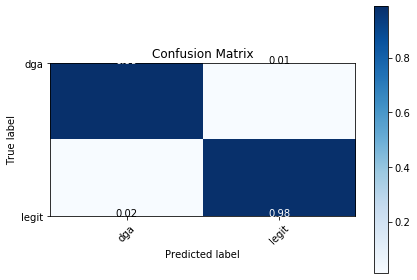

In [69]:
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

cm = cm.astype('float') / cm.sum(axis=1).T[:, np.newaxis]

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([1, 0], labels, rotation=45)
plt.yticks([1, 0], labels)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

ROC-кривая

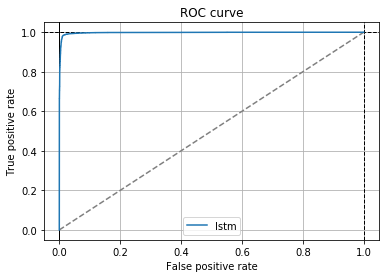

In [70]:
plt.figure()
plt.plot([0, 1], [0, 1], '--', color="grey")
plt.axvline(0, linestyle="-", c="black", lw=1)
plt.axvline(1, linestyle="--", c="black", lw=1)
plt.axhline(1, linestyle="--", c="black", lw=1)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot(fpr, tpr, label='lstm')
plt.grid(True)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show() 

Кривая Точность-Полнота (Precision-Recall)

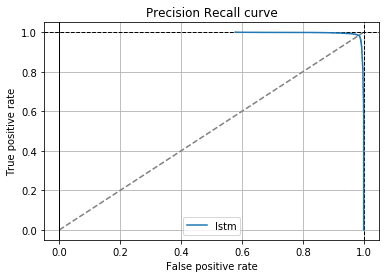

In [72]:
plt.figure()
plt.plot([0, 1], [0, 1], '--', color="grey")
plt.axvline(0, linestyle="-", c="black", lw=1)
plt.axvline(1, linestyle="--", c="black", lw=1)
plt.axhline(1, linestyle="--", c="black", lw=1)
fpr, tpr, thresholds = precision_recall_curve(y_test, y_score)
plt.plot(fpr, tpr, label='lstm')
plt.grid(True)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Precision Recall curve')
plt.legend(loc='best')
plt.show()